In [11]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

from eval import get_model_from_run, build_evals, eval_model
from plot_utils import basic_plot

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "fixedcov-N40-50ksteps-test1"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)

model, conf = get_model_from_run(run_path, step=-1)
model = model.eval()

evaluation_kwargs = build_evals(conf)['standard']

scale = 1
evaluation_kwargs['n_points'] = 101 # 41
evaluation_kwargs['task_sampler_kwargs']={'scale':scale, 'num_tasks':64}

# may need to uncomment line 49 in eval.py to get the metrics
metrics = eval_model(model, **evaluation_kwargs)

In [13]:
evaluation_kwargs 

{'task_name': 'linear_regression',
 'n_dims': 20,
 'n_points': 101,
 'batch_size': 64,
 'data_name': 'gaussian',
 'prompting_strategy': 'standard',
 'task_sampler_kwargs': {'scale': 1, 'num_tasks': 64}}

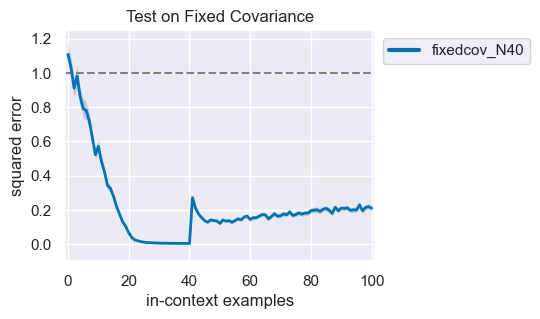

In [14]:
#print(metrics)

n_dims = evaluation_kwargs['n_dims']
normed_metrics = {key:[val/n_dims for val in arr] for key,arr in metrics.items()}

all_metrics = {'fixedcov_N40': normed_metrics}
basic_plot(all_metrics, models=('fixedcov_N40',))
plt.title('Test on Fixed Covariance')
plt.gca().set_ylim(-0.1, scale + 0.25)

plt.show()

Minimum at 20 - 40 samples reproduced. Not seeing the sharp jump after 40.